In [2]:
!gdown --fuzzy 'https://drive.google.com/file/d/1_jP8Ec6IpMdB10aJdex5pPyKtXq8ijNO/view?usp=sharing'

Downloading...
From: https://drive.google.com/uc?id=1_jP8Ec6IpMdB10aJdex5pPyKtXq8ijNO
To: /content/CS6700_PA1_Data.tar.xz
100% 13.2M/13.2M [00:00<00:00, 15.7MB/s]


In [3]:
filename = "CS6700_PA1_Data.tar.xz"
!tar xf {filename}

In [5]:
!ls -1 data | wc -l

32


In [9]:
!ls -1 data/AA_qlearning_False_0_4_1_EpsilonGreedy_AA | wc -l

125


We have data from 32 different configurations.  
Each configuration should have data from 125 different hyperparameter combinations.

In [10]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from IPython.display import display, Markdown, Latex

In [31]:
from pathlib import Path

path = Path('/content/data')
best_expt_by_id = {}  # stores expt name, maps to object
for config_id, config in enumerate(path.iterdir()):
    best_expt_by_id[config_id] = []
    max_tot_reward = -np.inf

    for expt in config.iterdir():
        data = np.load(config / expt)

        temp = str(expt).split('_')
        algorithm = temp[1]
        wind = bool(temp[2])
        start_coord = np.fromiter(map(int, [temp[3], temp[4]]), int)
        p = float(temp[5])
        strategy = temp[6]
        alpha = float(temp[8])
        gamma = float(temp[9])
        heat_or_eps = float(temp[10])

        tot_rewards = data['r_s'].sum()

        if tot_rewards > max_tot_reward:
            max_tot_reward = tot_rewards
            path = config / expt
            best_expt_by_id[config_id] = [algorithm, strategy, wind, start_coord, p, alpha, gamma, heat_or_eps, path]


In [32]:
def sort_order(item):
    key, (algorithm, strategy, wind, start_coord, p, alpha, gamma, heat_or_eps, path) = item
    return algorithm == "sarsa", start_coord.sum(), p, wind,
best_expt_by_id = dict(sorted(best_expt_by_id.items(), key=sort_order))

In [33]:
len(best_expt_by_id)

32

In [14]:
DOWN , UP, LEFT, RIGHT = 0, 1, 2, 3
x_direct = []

def plot_Q(Q, ax):
    sns.heatmap(Q.max(-1), edgecolors='k', linewidths=0.5, ax=ax)

    def x_direct(a):
        if a in [UP, DOWN]:
            return 0
        return 1 if a == RIGHT else -1

    def y_direct(a):
        if a in [RIGHT, LEFT]:
            return 0
        return 1 if a == UP else -1

    policy = Q.argmax(-1)
    policyx = np.vectorize(x_direct)(policy)
    policyy = np.vectorize(y_direct)(policy)
    idx = np.indices(policy.shape)
    ax.quiver(idx[1].ravel() + 0.5, idx[0].ravel() + 0.5, policyx.ravel(), policyy.ravel(), pivot="middle", color='red')


#Experiment 1 

| Algorithm | Exploration Strategy | Wind | Start Coors | P |
| :-: | :-: | :-: | :-: | :-: |
| sarsa | EpsilonGreedy | True | [3 6] | 0.7 |

### Hyperparameters

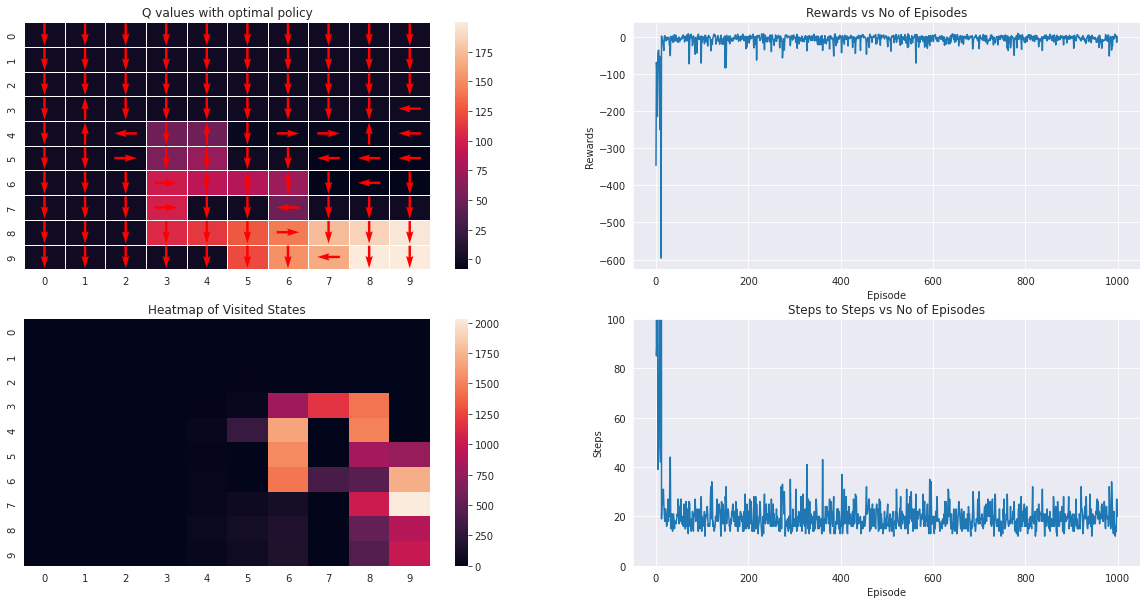

In [19]:
tick = 1
for key in best_expt_by_id.keys():

    expt_info = best_expt_by_id[key]
    [algorithm, strategy, wind, start_coord, p, alpha, gamma, heat_or_eps, path] = expt_info
    if algorithm != "sarsa":
      continue

    display(Markdown(f'#Experiment { tick } '))
    outputs=f"| Algorithm | Exploration Strategy | Wind | Start Coors | P |",f"| :-: | :-: | :-: | :-: | :-: |", f"| {algorithm} | {strategy} | {wind} | {start_coord} | {p} |"
    display(Markdown("\n".join(outputs)))

    display(Markdown(f'### Hyperparameters'))


    data = np.load(path)
    Q = data['q']
    Q = np.transpose(Q, axes=(1,0,2))[:, ::-1, :]
    visits = data['visits']
    visits = visits[::-1, ::]

    fig, axs = plt.subplots(2,2, figsize=(20,10))

    plot_Q(Q, axs[0,0])
    axs[0,0].set_title('Q values with optimal policy')
    
    # Plotting Reward Curve 
    episodes = np.arange(data['r_s'].shape[0])
    axs[0,1].plot(episodes, data['r_s'])
    axs[0,1].set_title('Rewards vs No of Episodes')
    axs[0,1].set_xlabel('Episode')
    axs[0,1].set_ylabel('Rewards')
    fig.show()

    # Plotting Steps Curve 

    axs[1,1].plot(episodes, data['s_s'])
    axs[1,1].set_title('Steps to Steps vs No of Episodes')
    axs[1,1].set_xlabel('Episode')
    axs[1,1].set_ylabel('Steps')
    axs[1,1].set_ylim(0,100)

    # Plotting Heatmap of visited states
    sns.heatmap(visits, ax = axs[1,0])
    axs[1,0].set_title('Heatmap of Visited States')

    fig.show()

    plt.pause(0.001)
    tick += 1
    break


In [ ]:
|

In [ ]:
# Header1

# Headder 1
- A
- B
